In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sqlalchemy as sqla
import sqlite3 as sq
import joblib
import pickle

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
db = sqla.create_engine('sqlite:///zillow.db')

In [4]:
df = pd.read_sql('SELECT * FROM zillow', db)

In [5]:
df.head()

,Bedrooms,RegionName,Date,Price
0,0,Memphis,1996-01-31,75490
1,0,Memphis,1996-02-29,75633
2,0,Memphis,1996-03-31,75801
3,0,Memphis,1996-04-30,76142
4,0,Memphis,1996-05-31,76524


In [6]:
df.dtypes

Bedrooms       int64
RegionName    object
Date          object
Price          int64
dtype: object

In [7]:
df['Date']= pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Bedrooms               int64
RegionName            object
Date          datetime64[ns]
Price                  int64
dtype: object

In [13]:
import datetime as dt

In [16]:
df['test2'] = (dt.now - df['Date']).dt.days

AttributeError: module 'datetime' has no attribute 'now'

In [10]:
df

,Bedrooms,RegionName,Date,Price,test2
0,0,Memphis,1996-01-31,75490,0
1,0,Memphis,1996-02-29,75633,0
2,0,Memphis,1996-03-31,75801,0
3,0,Memphis,1996-04-30,76142,0
4,0,Memphis,1996-05-31,76524,0
...,...,...,...,...,...
642976,5,Braden,2019-11-30,266558,0
642977,5,Braden,2019-12-31,269833,0
642978,5,Braden,2020-01-31,271472,0
642979,5,Braden,2020-02-29,276641,0


In [8]:
df2 = df[['Date','Price']]

In [10]:
# rename columns to using ds for timedate and y for value
df2.rename(columns = {'Date':'ds', 'Price':'y'}, inplace = True)

C:\Users\Tommy\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
df2.head()

,ds,y
0,1996-01-31,75490
1,1996-02-29,75633
2,1996-03-31,75801
3,1996-04-30,76142
4,1996-05-31,76524


In [13]:
from prophet import Prophet

In [ ]:
# Python
m = Prophet(daily_seasonality=True)
m.fit(df2)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

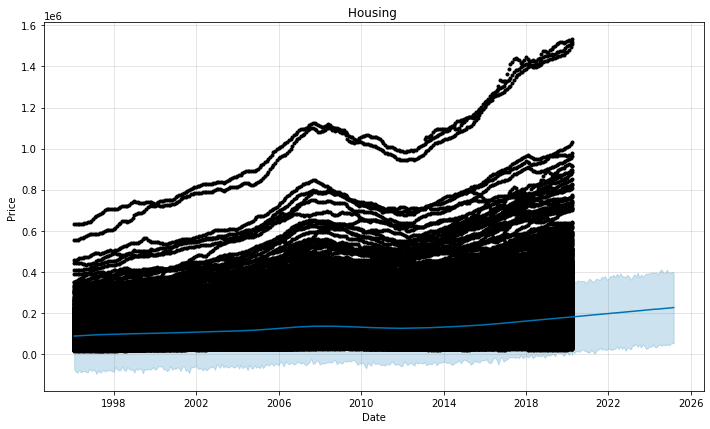

In [11]:
# Import Facebook Prophet for time series modeling
from prophet import Prophet
# copy of datatable
df2 = df.copy()
# reset index so index is no longer date column
df2 = df2.reset_index()
# rename columns to using ds for timedate and y for value
df2['ds'] = df2['Date']
df2['y'] = df2['Price']
# call model, not sure about interval_model 
model = Prophet(interval_width=0.95)
#fit datatable
model.fit(df2)
# create forecast for 60 months 
forecast = model.make_future_dataframe(periods=60, freq='MS')
forecast = model.predict(forecast)
#plot model
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Housing ');

In [59]:
df2 = df.loc[df['Date'] >= '2010-01-01']
df2

,Bedrooms,RegionName,Date,Price
168,0,Memphis,2010-01-31,75399
169,0,Memphis,2010-02-28,75209
170,0,Memphis,2010-03-31,75016
171,0,Memphis,2010-04-30,74787
172,0,Memphis,2010-05-31,74614
...,...,...,...,...
642976,5,Braden,2019-11-30,266558
642977,5,Braden,2019-12-31,269833
642978,5,Braden,2020-01-31,271472
642979,5,Braden,2020-02-29,276641


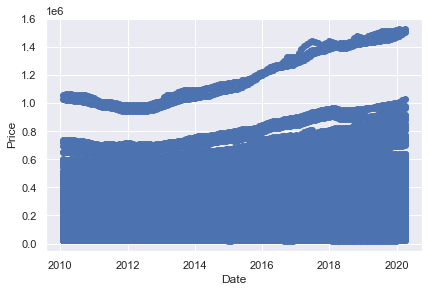

In [65]:
plt.scatter(df2['Date'], df2['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [76]:
df2.dtypes

Bedrooms               int64
RegionName            object
Date          datetime64[ns]
Price                  int64
dtype: object

In [81]:
df2['Date'] = pd.to_numeric(df2['Date'])

C:\Users\Tommy\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
X = df2.Date.values.reshape(-1, 1)

In [83]:
X.shape

(308450, 1)

In [84]:
y = df2.Price

In [85]:
model = LinearRegression()

In [86]:
model.fit(X, y)


LinearRegression()

In [87]:
y_pred = model.predict(X)
print(y_pred.shape)

(308450,)


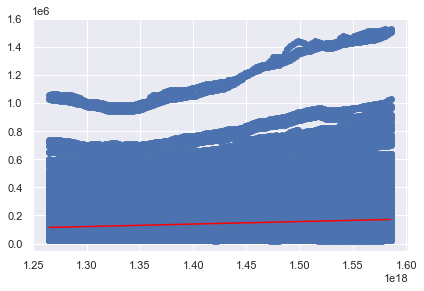

In [88]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [89]:
print(model.coef_)
print(model.intercept_)


[1.77812504e-13]
-110197.17404212078


In [10]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Price'])

In [11]:
#Converting the dataframe to a numpy array
dataset = data.values

In [12]:
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [13]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [14]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [15]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [17]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

NotImplementedError: Cannot convert a symbolic Tensor (lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [6]:
le = LabelEncoder()

In [7]:
df2 = df.copy()
df2['Bedrooms'] = le.fit_transform(df2['Bedrooms'])
df2['RegionName'] = le.fit_transform(df2['RegionName'])
df2['Date'] = le.fit_transform(df2['Date'])
# df2['Price'] = le.fit_transform(df2['Price'])

In [8]:
df2.head()

,Bedrooms,RegionName,Date,Price
0,0,302,0,75490
1,0,302,1,75633
2,0,302,2,75801
3,0,302,3,76142
4,0,302,4,76524


In [36]:
# Separate the features (X) from the target (y):
y = df2['Price']
X = df2.drop(columns=['Price','Date'])
X.shape

(642981, 2)

In [37]:
df2.dtypes

Bedrooms      int64
RegionName    int32
Date          int32
Price         int64
dtype: object

In [23]:
from termcolor import colored as cl # text customization

In [38]:
# FEATURE SELECTION & DATA SPLIT

X_var = df2[['Bedrooms', 'RegionName', 'Date']].values
y_var = df2['Price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[  2 421  87]
 [  2 354 226]
 [  3  81 198]
 [  4 304 180]
 [  4 464 105]]
X_test samples :  [[  0  58 255]
 [  0  45 199]
 [  1 476 209]
 [  3 297 253]
 [  3 469 131]]
y_train samples :  [ 31922  90002  72516  79828 167175]
y_test samples :  [127353  68807 118841  94347 116832]


In [32]:
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

In [39]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)

In [40]:
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [41]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))

print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.19620662057925464
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.1962066196371246
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.19620662011890466
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.19620653145446432
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.19620134174262638
-------------------------------------------------------------------------------


In [29]:
# Split data into training & testing:
X_train, X_test, y_train, y_test = train_test_split(
#     X, y, random_state=1, stratify=y)
    X, y, random_state=1)
X_train.shape

(482235, 3)

In [30]:
# Resample the training data with the RandomOversampler:
ROS = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ROS.fit_resample(X_train, y_train)

In [36]:
model = LinearRegression()

In [38]:
model.fit(X, y)


LinearRegression()

In [40]:
model = LinearRegression().fit(X, y)

In [42]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.19591362682282798


In [43]:
y_pred = model.predict(X)
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 40557.90175085  40791.57131536  41025.24087988 ... 214948.65276705
 215182.32233156 215415.99189608]


In [ ]:
# Save the model:
joblib.dump(ROS_model, 'house_price_predictor.pkl')

In [111]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

In [122]:
df.dtypes

Bedrooms      int64
RegionName    int32
Date          int32
Price         int64
dtype: object

In [112]:
X = df.Date.values.reshape(-1, 1)

In [113]:
y = df['Price']

In [114]:
model = LinearRegression()

In [115]:
model.fit(X, y)

LinearRegression()

In [116]:
y_pred = model.predict(X)
print(y_pred.shape)

(642981,)


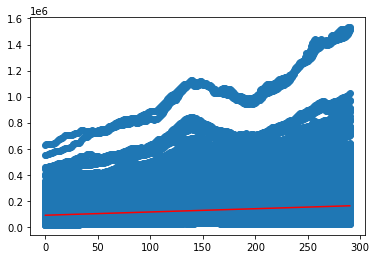

In [117]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [118]:
print(model.coef_)
print(model.intercept_)

[250.30714706]
89031.26675118819


In [120]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [ ]:
# use predict method predict(X) X=all values as a list 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict
